# Numpy, A Vanilla Neural Network & Pytorch

## Numpy Vanilla SGD

Numpy deals with matrices.

### Why matrices?

#### Reason to action
In the simple single number world(scalar), many problem can be boil down into "if it rains, I'll stay at home on saturday". Single reason cause the single action.

#### Reasons to actions
Say you might stay at home on saturday, you might go to the movie, you might go to the bar, you might go to the park, you might visit the museum.etc.  Each possible action you might choose are from tens of the reasons. The possibility of you going to museum can be decided from all kinds of things, weather will be a heavy weight reason, or if there is a friend who can explain good history/art, or if there is an attractive one who's willing to go there and looking for someone to accompany him/her, or if your personality thinks going to museum is a dumb idea. Of course, "if your personality thinks going to museum is a dumb idea" will also cause certain decision making about if you are going to a bar.

#### Reasons to actions in table format
Since there might be 10 possible actions you might take, and there might be 1000 possible condition, reasons for you to choose between 10 actions. How about I'll save some of the typing, and give out a mapping table, about how of the each reason that's going to affect each of your action choosing. So there will be what? a table of 1000 * 10, right. each contains a number about how strong is the each of the given condition(x) will affect your action(y).

Matrix is a sexy way to name the table situation.

** In many gradient descent based problems, Machine learning means to obtain the better/ feasible matrix (weights) **


The Cifar 10 example is modified from [here](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py)

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np

In [ ]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

In [ ]:
# Create random input and output data
x = np.random.rand(N, D_in)
y = np.random.rand(N, D_out)
x.shape,y.shape

In [ ]:
# Randomly initialize weights
w1 = np.random.rand(D_in, H)
w2 = np.random.rand(H, D_out)

w1.shape,w2.shape

In [ ]:
learning_rate=1e-6
from tqdm import trange # this is for printing out pretty progress bar instead of printing out line by line

for i in trange(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    
    # Compute and print loss, in this case, sum of the squared error
    loss = np.square(y_pred - y).sum()
    
    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # Update weights, 
    # the simplist form of gradient-descent-based optimizer
    w1-=grad_w1 * learning_rate
    w2-=grad_w2 * learning_rate

## From numpy to pytorch

Pytorch is like numpy, but:

* A simple pytorch neural network example goes very much **like the vanilla numpy nn** you just did, but **simpler**. Actually the numpy example above is from [this official pytorch tutorial](http://pytorch.org/tutorials/beginner/pytorch_with_examples.html)
* It can calculate gradients **automatically**. In one single line of coding
* It has various kinds of ready to use optimizers.
* It can run on **gpu**, in most cases faster than tensorflow, also it can perform matrix/tensor operations on gpu even if it's not machine learning task.
* It includes many powerful and easy to use tools to process data, to wash & slice them up nice and clean.
* It has a logo and cooler name.

And more, the summarization is not conclusive.

Now it sounds less daunting when I tell you this is the most trending deep learning library for top research labs and universities, right?

In [2]:
from torchvision.datasets import CIFAR10,MNIST
import torchvision
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader

#### Transformation is a pipe line(a list of actions, to define how will the data being processed along the line)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.5],[.5]) ])

#### Download/Load the data through the transformation pipelie

In [4]:
DL = False
train_set=MNIST("./data",train=True,download=DL,transform=transform)
test_set=MNIST("./data",train=False,download=DL,transform=transform)

#### Make data loaders

In [5]:
train_loader = DataLoader(train_set,batch_size=160,num_workers=2,shuffle=True)
test_loader = DataLoader(test_set,batch_size=160,num_workers=2,shuffle=True)

#### Make a generator out of data loader

In [6]:
train_iter=iter(train_loader)
test_iter=iter(test_loader)

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg.reshape(28,28))
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [8]:
sample=train_iter.__next__()  # structure: x,batch_size, channel, height, width ;y, batch_size

sample[0].size(),sample[1].size()

(torch.Size([160, 1, 28, 28]), torch.Size([160]))

9


(None, None)

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


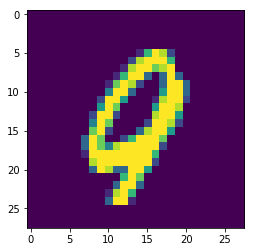

In [9]:
i_ = 4
imshow(sample[0][i_]),print(sample[1][i_])

In [10]:
import torch
from torch.autograd import Variable
from torch import nn
import torch.nn.functional as F

In [11]:
class dnn_mnist(nn.Module):
    def __init__(self,nb_feat):
        super(dnn_mnist,self).__init__()
        # in this case, the feature number is 100
        self.nb_feat = nb_feat
        
        # Set a mapping, layer 1 is a matrix of 784 * 100 + 100 bias, 784 is from 28 * 28 of the pixel
        self.fc1 = nn.Linear(784,self.nb_feat)
        # layer 2 is a matrix of 100 * 10  + 10 bias, 10 for 10 classes, 0 to 9
        self.fc2 = nn.Linear(self.nb_feat,10)
        
    def forward(self,x):
        # Reshape
        x = x.view(-1,784)
        # x goes through 1st layer & activation
        x = F.relu(self.fc1(x))
        # then goes through 2nd layer & activation
        x = F.softmax(self.fc2(x))
        return x

In [21]:
dnn = dnn_mnist(100)

In [22]:
from torch import optim
from tqdm import trange

#### torch.cuda.is_available() will return True or False on if this machine possess GPU/ is its CUDA ready

In [23]:
CUDA = torch.cuda.is_available()
print("For now is the gpu/cuda available?",CUDA)
if CUDA: 
    dnn.cuda()

For now is the gpu/cuda available? False


#### Set the loss function

In [24]:
celoss=nn.CrossEntropyLoss()

#### Adam is a SGD based optmization, short for Stochastic Gradient Descent

#### Gradient Descent, is the thing you've just done in numpy

dnn.parameters() will return a list of the parameters that you want to update, **if you only put half of the parameters, the other half of parameters will stay the same**

In [25]:
optmizer = optim.Adam(dnn.parameters())  

In [26]:
for epoch in range(1):
    # make generator
    train_gen = iter(train_loader)
    # set running loss & Learning Accurace to 0
    r_loss,r_acc=0,0
    
    t=trange(len(train_loader))
    for i in t:
        # x being the image array, y being the labels
        x,y=train_gen.__next__()
        # Turn data into Variable, for Variables can be feed into the model graph
        x,y=Variable(x),Variable(y)
        if CUDA:
            x.cuda()
            y.cuda()
        
        # Predict a y_
        y_= dnn(x)
        
        # Score how wrong is y_, using label y as correct answers
        # Cross entropy loss
        Loss = celoss(y_,y)
        
        # Calculat the accurace of the guss just for reference
        y_max,y_idx = torch.max(y_,1)
        acc = torch.mean(torch.eq(y_idx,y).type(torch.FloatTensor))

        # update parameters
        # Set the gradient to zero for each loop
        optmizer.zero_grad()
        # Calculate a table of gradient
        Loss.backward()
        # use the gradient to change the parameters
        # remember in numpy example, parameters - (learning rate * gradient of the parameters)
        # a step for Adam involve more adaptive learning and with momentum mechanism, 
        # for now you don't have to worry that, just optimizer.step()
        optmizer.step()
        
        # add up the running loss/accuracy to be print out
        r_loss += Loss.data[0]
        r_acc += acc.data[0]
        
        if i%20==19: # for every 20 batch
            t.set_description("ep%s_bt%s\t[Ls]:\t[%.2f]\tacc:\t%.3f"%(epoch,i,
                                             r_loss/20,
                                             r_acc/20,))
            # reset running accurace, running loss
            r_acc,r_loss=0,0

ep0_bt359	[Ls]:	[1.57]	acc:	0.901: 100%|██████████| 375/375 [00:05<00:00, 74.05it/s]


In [60]:
layer2 = dnn.fc2.weight.data.numpy()
print(layer2.shape)
# what hidden unit will decide the most when it comes to predict 8?
print(layer2[8]>.1)
# promintent hidden neuron for 8
neurons = np.argwhere((layer2[8]>.1)==True).reshape(-1)
print(neurons)

(10, 100)
[False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True False False False False False False False False False False
 False False False  True False False False False False False False  True
  True False  True False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False]
[22 47 49 63 71 72 74 82 97]


In [39]:
layer1 = dnn.fc1.weight.data.numpy()
print(layer1.shape)

(100, 784)


#### The follow pattens are remembered in hidden neurons,  the following will have strong suggest on digit "8"

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


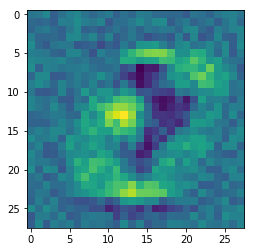

In [61]:
plt.imshow(layer1[neuron[0]].reshape(28,28))

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


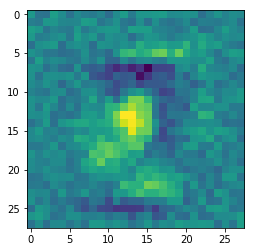

In [62]:
plt.imshow(layer1[neuron[1]].reshape(28,28))

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


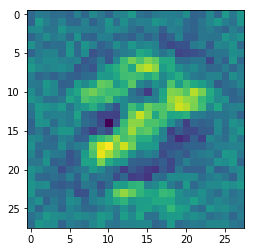

In [63]:
plt.imshow(layer1[neuron[2]].reshape(28,28))

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


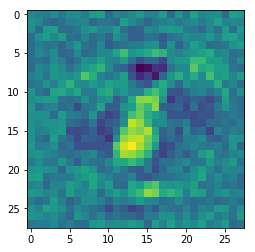

In [64]:
plt.imshow(layer1[neuron[3]].reshape(28,28))

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


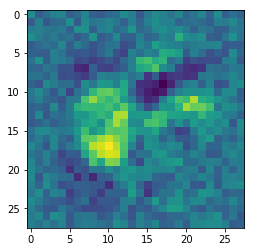

In [65]:
plt.imshow(layer1[neuron[4]].reshape(28,28))

### Excercise

The above example doesn't have validation/test score to compare against the training score.

At the end of each epoch print out a loss score and an accuracy for comparing

### Cifar Dataset and Convolution

Now we deal with more advance structure.

If you're uncomfortable with the progress you are making. Consult the author (Ray) in bunker or Mohammed.

If you've already familiared yourself with convolutions, read on and try the code.

In [4]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.5,.5,.5],[.5,.5,.5]) ])

In [7]:
DL = False
train_set=CIFAR10("./data",train=True,download=DL,transform=transform)
test_set=CIFAR10("./data",train=False,download=DL,transform=transform)

In [8]:
train_loader = DataLoader(train_set,batch_size=160,num_workers=2,shuffle=True)
test_loader = DataLoader(test_set,batch_size=160,num_workers=2,shuffle=True)

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
train_iter=iter(train_loader)
test_iter=iter(test_loader)

In [12]:
sample=train_iter.__next__()  # structure: x,batch_size, channel, height, width ;y, batch_size

sample[0].size(),sample[1].size()

In [ ]:
def imshow_c(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
#     plt.imshow(npimg.reshape(28,28))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plane


(None, None)

/Users/zhangxiaochen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['msyh'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


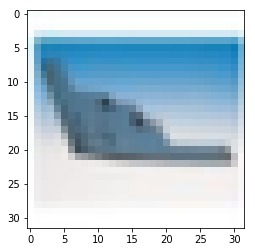

In [14]:
i_ = 4
imshow_c(sample[0][i_]),print(classes[sample[1][i_]])

In [17]:
class basic_cnn(nn.Module):
    def __init__(self):
        super(basic_cnn,self).__init__()
        self.conv1 = nn.Conv2d(3,32,(3,3),stride=(1,1),padding=1)
        self.conv2 = nn.Conv2d(32,64,(3,3),stride=(1,1),padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64,64,(3,3),stride=(1,1),padding=1)
        self.conv4 = nn.Conv2d(64,128,(3,3),stride=(2,2),padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128,128,(3,3),stride=(1,1),padding=1)
        self.conv6 = nn.Conv2d(128,128,(3,3),stride=(2,2),padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d((2,2))
        
        self.fc1 = nn.Linear(128,128)
        self.bn_fc1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        # Conv layers
        
        # Conv block1
        x = F.relu(self.conv1(x))
        x = self.pool(self.bn1(F.relu(self.conv2(x))))
        
        # Conv blcok2
        x = F.relu(self.conv3(x))
        x = self.pool(self.bn2(F.relu(self.conv4(x))))
        
        # Conv block3
        x = F.relu(self.conv5(x))
        x = self.pool(self.bn3(F.relu(self.conv6(x))))
        
        x = x.view(-1,128)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.bn_fc1(x)
        return F.softmax(self.fc2(x))
    
cnn = basic_cnn()

Size of all the weights

In [18]:
np.sum(list(np.product(list(l.size())) for l in cnn.parameters()))

444042

In [20]:
optimizer = optim.Adam(cnn.parameters())
loss_func = nn.CrossEntropyLoss()

In [ ]:
# torch.cuda.empty_cache()

# torch.cuda.is_available()

In [ ]:
torch.cuda.is_available()

In [ ]:
window=20
CUDA=torch.cuda.is_available()
if CUDA:
    cnn.cuda()
for epoch in range(1):
    train_iter=iter(train_loader)
    test_iter=iter(test_loader)
    running_loss,running_acc = 0,0
    
    t=trange(len(train_loader))
    for i in t:
        # get data
        x,y = train_iter.__next__()
        if CUDA:
            x,y = Variable(x.cuda()),Variable(y.cuda())
        else:
            x,y = Variable(x),Variable(y)
        
        # make the gradient zero
        optimizer.zero_grad()
        
        # forward pass & calc loss
        y_ = cnn(x)
        loss = loss_func(y_,y)
        if CUDA:
            acc=np.mean(np.equal(y_.data.cpu().numpy().argmax(axis=-1),y.data.cpu().numpy()))
        else:
            acc=np.mean(np.equal(y_.data.numpy().argmax(axis=-1),y.data.numpy()))
        
        # calculate the gradient
        loss.backward()
        # update the gradient to the weights
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        running_acc += acc
        
        if i%window == 0:
            loss_,acc_=running_loss/window,running_acc/window
            t.set_description("epoch%s_b%s \tloss:\t%.2f \t acc:\t%.3f"%(epoch,i,loss_,acc_))
            running_loss = 0
            running_acc = 0
    
    # Validation score
    loss_t,acc_t=0,0
    for i in range(len(test_loader)):
        x,y = test_iter.__next__()
        if CUDA:
            x,y = Variable(x.cuda()),Variable(y.cuda())
        else:
            x,y = Variable(x),Variable(y)
        y_ = cnn(x)
        loss_t += loss_func(y_,y)
        if CUDA:
            acc_t +=np.mean(np.equal(y_.data.cpu().numpy().argmax(axis=-1),y.data.cpu().numpy()))
        else:
            acc_t +=np.mean(np.equal(y_.data.numpy().argmax(axis=-1),y.data.numpy()))
    print("[Validation]\tloss:\t%.2f\tacc:\t%.3f\t[%s]"%(loss_t/len(test_loader),
                                                         acc_t/len(test_loader)),
                                                          "overfitting" if loss_t/len(test_loader)>loss_ else "Not overfitting")
print("="*60,"\n","Training finished","\n","="*60)

epoch0_b0 	loss:	0.09 	 acc:	0.036: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


### Tiny Densenet

If you are good with python class and the input/output dimensions of convolution, try the next example for challenge.

DenseNet is from last year's image classification research. It was considered most successful breakthrough on the subject on 2017

It takes full advantage of skip connection, but its skip connections work in a densely connected way.

It doesn't overfit easily, and can achieve the same benchmark like resnet but with fewer parameters

See the [DenseNet Paper](https://arxiv.org/abs/1608.06993)

Here we build a tiny densenet for cifar 10 problem

In [170]:
class basic_dn(nn.Module):
    def __init__(self,fil_nb=16,block_nb=4,conv_in_block=5):
        """
        basic tiny dense net structure with pytorch
        """
        super(basic_dn,self).__init__()
        self.block_nb = block_nb
        self.conv_in_block = conv_in_block
        # if the stride is (1,1), we set padding to 0, and the map won't reduce size
        self.conv0 = nn.Conv2d(3,fil_nb,(1,1),stride=(1,1),padding=0)
        for i in range(self.block_nb):
            for j in range(self.conv_in_block-1):
                setattr(self,"dn_%s_%s"%(i,j),nn.Conv2d(fil_nb+j*fil_nb,
                                  fil_nb+j*fil_nb,
                                  (3,3),stride=(1,1),padding=1))
            setattr(self,"dn_%s_%s"%(i,self.conv_in_block-1),
                    nn.Conv2d(fil_nb*(self.conv_in_block),fil_nb*2,(1,1),stride=(1,1),padding=0))
            fil_nb *= 2
            setattr(self,"bn_%s"%(i),nn.BatchNorm2d(fil_nb))
             
        self.pool = nn.MaxPool2d((2,2))
        
        self.fc1 = nn.Linear(1024,512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512,10)
        
    def forward(self,x):
        # Conv layers
        x = self.conv0(x)
        #print("after0\t",x.size())
        for i in range(self.block_nb):
            xc = x
            
            for j in range(self.conv_in_block-1):
                #print("dn_%s_%s\t"%(i,j),getattr(self,"dn_%s_%s"%(i,j)).weight.size())
                xc = torch.cat([getattr(self,"dn_%s_%s"%(i,j))(xc),x],dim=1)
                #print("dn_%s_%s after concat\t"%(i,j),xc.size())
                xc = F.relu(xc)
                
            x = getattr(self,"dn_%s_%s"%(i,self.conv_in_block-1))(xc)
            #print("dn_%s_%s after \t"%(i,j),x.size())
            x = F.relu(x)
            x = getattr(self,"bn_%s"%(i))(x)
            x = self.pool(x)
        
        x = x.view(-1,1024)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.bn_fc1(x)
        return F.softmax(self.fc2(x))
    
dn = basic_dn()

In [171]:
np.sum(list(np.product(list(l.size())) for l in dn.parameters()))

6627658

In [175]:
optimizer = optim.Adam(dn.parameters())
loss_func = nn.CrossEntropyLoss()

In [173]:
dn

basic_dn(
  (conv0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
  (dn_0_0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_0_1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_0_2): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_0_3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_0_4): Conv2d(80, 32, kernel_size=(1, 1), stride=(1, 1))
  (bn_0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (dn_1_0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_1_2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_1_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dn_1_4): Conv2d(160, 64, kernel_size=(1, 1), stride=(1, 1))
  (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (dn_2_0): Conv2d(64, 64, kernel_size=(3, 3), stri

In [174]:
window=20
CUDA=True
if CUDA:
    dn.cuda()
for epoch in range(10):
    train_iter=iter(train_loader)
    running_loss = 0
    running_acc = 0
    
    t=trange(len(train_loader))
    for i in t:
        # get data
        x,y = train_iter.__next__()
        if CUDA:
            x,y = Variable(x.cuda()),Variable(y.cuda())
        else:
            x,y = Variable(x),Variable(y)
        
        # make the gradient zero
        optimizer.zero_grad()
        
        # forward pass & calc loss
        y_ = dn(x)
        loss = loss_func(y_,y)
        if CUDA:
            acc=np.mean(np.equal(y_.data.cpu().numpy().argmax(axis=-1),y.data.cpu().numpy()))
        else:
            acc=np.mean(np.equal(y_.data.numpy().argmax(axis=-1),y.data.numpy()))
        
        # calculate the gradient
        loss.backward()
        # update the gradient to the weights
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        running_acc += acc
        
        if i%window == 0:
            t.set_description("epoch_%s_batch_%s \tloss:\t%.2f \t acc:\t%.3f"%(epoch,i,running_loss/window,running_acc/window))
            running_loss = 0
            running_acc = 0
        
print("="*60,"\n","Training finished","\n","="*60)

Exception ignored in: <bound method DataLoaderIter.__del__ of <torch.utils.data.dataloader.DataLoaderIter object at 0x7ff6566774a8>>
Traceback (most recent call last):
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 333, in __del__
    self._shutdown_workers()
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 319, in _shutdown_workers
    self.data_queue.get()
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/multiprocessing/queues.py", line 345, in get
    return _ForkingPickler.loads(res)
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/zhangxiaochen/anaconda3/lib/python3.6/multiprocessing/

 Training finished 
